### **Plotting in Python using matplotlib.pyplot**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv**, **Countries.csv**, **Players.csv**, and **Teams.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Plotting from Python data structures

In [3]:
# Read Cities.csv and Countries.csv into lists of dictionaries
citiesList = []
with open('Cities.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        citiesList.append(dict(r))
countriesList = []
with open('Countries.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        countriesList.append(dict(r))

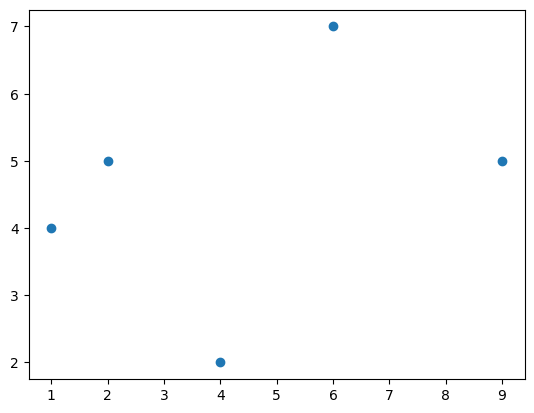

In [4]:
# Introduction to scatterplots
x = [1, 2, 4, 6, 9]
y = [4, 5, 2, 7, 5]
plt.scatter(x, y)
plt.show()

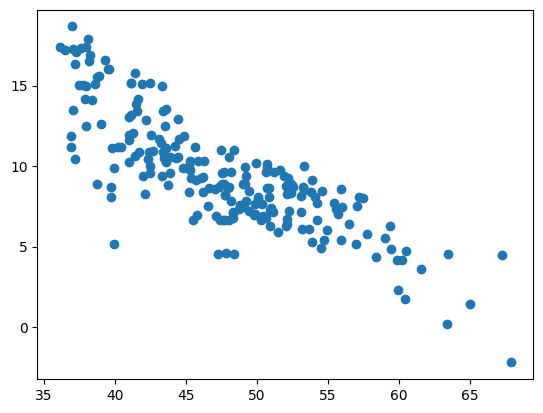

In [5]:
# Scatterplot of temperature (y) versus latitude (x)
x = []
y = []
for city in citiesList:
    x.append(float(city['latitude']))
    y.append(float(city['temperature']))
plt.scatter(x, y)
plt.show()
# Add labels to axes
# plt.xlabel('latitude')
# plt.ylabel('temperature')

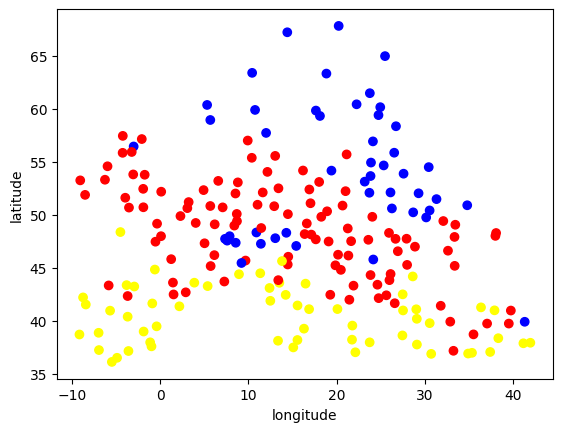

In [6]:
# Scatterplot of latitude (y) versus longitude (x) colored by temperature
x = []
y = []
colors = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    if float(city['temperature']) < 7:
        colors.append('blue')
    elif float(city['temperature']) < 11:
        colors.append('red')
    else: colors.append('yellow')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x, y, c=colors)
plt.show()

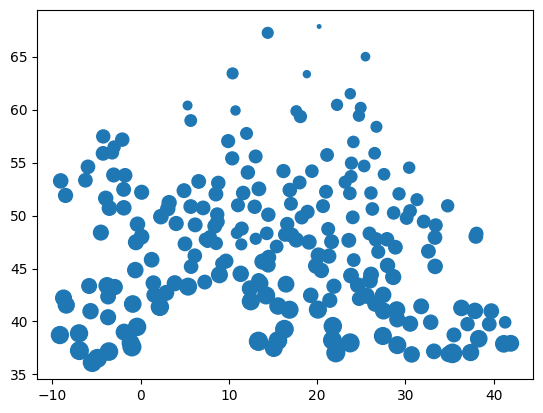

In [7]:
# Scatterplot of latitude (y) versus longitude (x) sized by temperature
x = []
y = []
size = []
for city in citiesList:
    x.append(float(city['longitude']))
    y.append(float(city['latitude']))
    size.append((float(city['temperature'])+3)*8) # +3 to avoid negative numbers
plt.scatter(x, y, size)
plt.show()

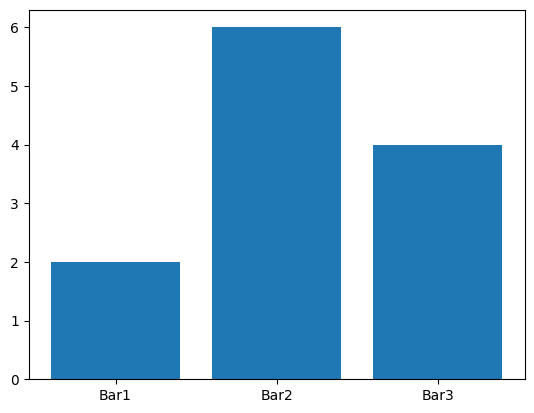

In [8]:
# Introduction to bar charts
bars = ['Bar1', 'Bar2', 'Bar3']
heights = [2, 6, 4]
plt.xticks([0,1,2], bars)
plt.bar([0,1,2], heights)
plt.show()

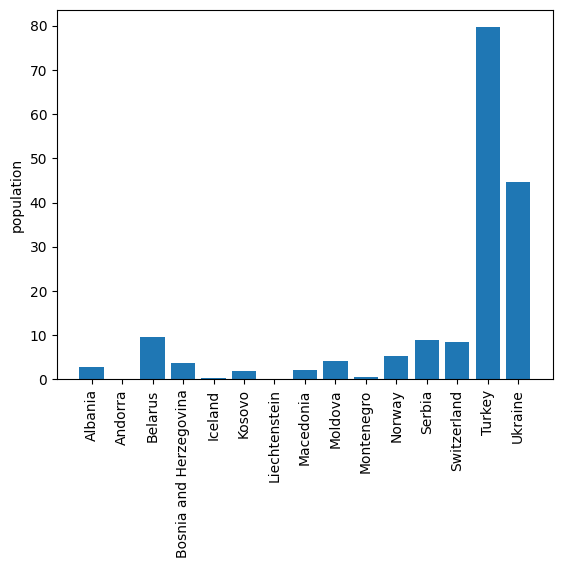

In [9]:
# Bar chart showing populations of non-EU countries
bars = []
heights = []
for country in countriesList:
    if country['EU'] == 'no':
        bars.append(country['country'])
        heights.append(float(country['population']))
ticks = list(range(len(bars))) # produces [0,1,...,n-1] for n bars
# print(ticks)
plt.xticks(ticks, bars, rotation='vertical')
plt.bar(ticks, heights)
plt.ylabel('population')
plt.show()

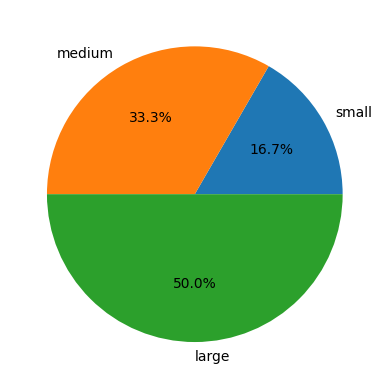

In [10]:
# Introduction to pie charts
sizes = [10, 20, 30]
lbls = ['small', 'medium', 'large']
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

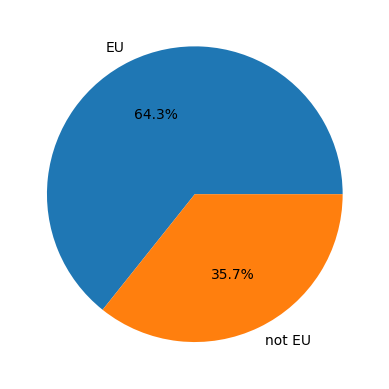

In [11]:
# Pie chart showing number of EU countries versus non-EU countries
numEU = 0
numNotEU = 0
for country in countriesList:
    if country['EU'] == 'yes': numEU += 1
    else: numNotEU +=1
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### Plotting from pandas dataframes

In [12]:
# Read Cities.csv and Countries.csv into dataframes
f = open('Cities.csv')
citiesDF = pd.read_csv(f)
f = open('Countries.csv')
countriesDF = pd.read_csv(f)

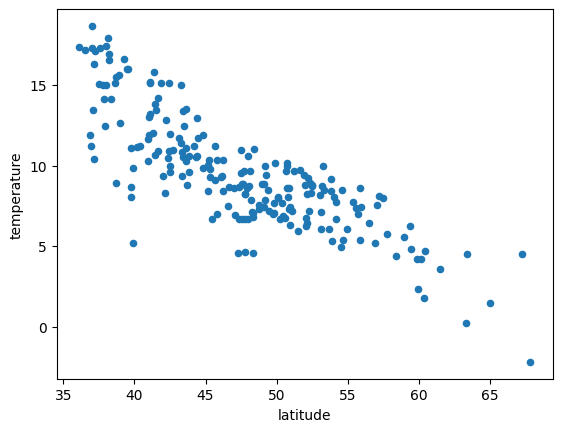

In [13]:
# Scatterplot of temperature (y) versus latitude (x)
citiesDF.plot.scatter('latitude', 'temperature')
plt.show()

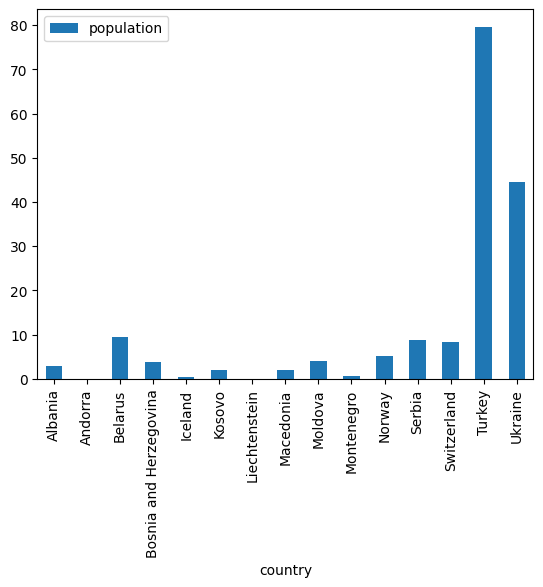

In [14]:
# Bar chart showing populations of non-EU countries
countriesDF[countriesDF.EU == 'no'].plot.bar('country', 'population')
plt.show()

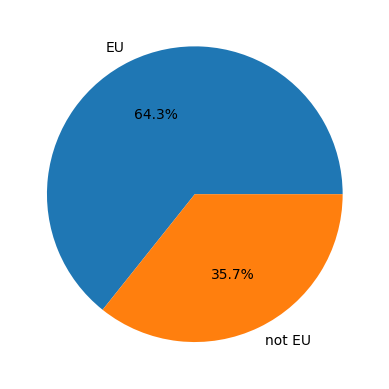

In [15]:
# Pie chart showing number of EU countries versus non-EU countries
# No convenient plotting direct from dataframe
numEU = len(countriesDF[countriesDF.EU == 'yes'])
numNotEU = len(countriesDF[countriesDF.EU == 'no'])
plt.pie([numEU, numNotEU], labels=['EU','not EU'], autopct='%1.1f%%')
plt.show()

### <font color="green">**Your Turn: World Cup Data**</font>

In [16]:
# Read Players.csv and Teams.csv into data structures and dataframes
# Use whichever one you prefer for plotting
# Lists of dictionaries
playersList = []
with open('Players.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        playersList.append(dict(r))
teamsList = []
with open('Teams.csv') as f:
    rows = csv.DictReader(f)
    for r in rows:
        teamsList.append(dict(r))
# Dataframes
f = open('Players.csv')
playersDF = pd.read_csv(f)
f = open('Teams.csv')
teamsDF = pd.read_csv(f)

#####*For each problem, use plain python (playersList and teamsList) or pandas (playersDF and teamsDF), whichever you think will work best.*

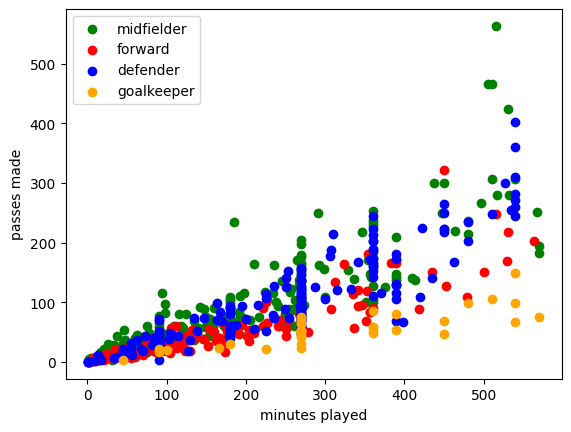

In [21]:
# Create a scatterplot of players showing passes made (y-axis)
# versus minutes played (x-axis). Color each player based on their
# position (goalkeeper, defender, midfielder, forward).
goalkeeper_x, goalkeeper_y = [], []
defender_x, defender_y = [], []
midfielder_x, midfielder_y = [], []
forward_x, forward_y = [], []

for player in playersList:
    minutes = int(player['minutes'])
    passes = int(player['passes'])
    if player['position'] == 'goalkeeper':
        goalkeeper_x.append(minutes)
        goalkeeper_y.append(passes)
    elif player['position'] == 'defender':
        defender_x.append(minutes)
        defender_y.append(passes)
    elif player['position'] == 'midfielder':
        midfielder_x.append(minutes)
        midfielder_y.append(passes)
    else:  # forward
        forward_x.append(minutes)
        forward_y.append(passes)

plt.xlabel('minutes played')
plt.ylabel('passes made')
plt.scatter(midfielder_x, midfielder_y, c='green', label='midfielder')
plt.scatter(forward_x, forward_y, c='red', label='forward')
plt.scatter(defender_x, defender_y, c='blue', label='defender')
plt.scatter(goalkeeper_x, goalkeeper_y, c='orange', label='goalkeeper')

plt.legend()
plt.show()

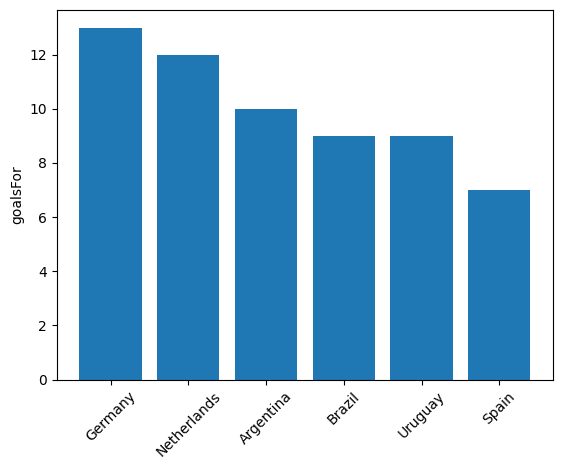

In [23]:
# Create a bar chart showing the number of goalsFor made by teams
# with more than two wins
team_data = []
for team in teamsList:
    if int(team['wins']) > 2:
        team_data.append((int(team['goalsFor']), team['team']))

# Sort the data in descending order by goalsFor
team_data.sort(key=lambda x: x[0], reverse=True)

bars = [data[1] for data in team_data]
heights = [data[0] for data in team_data]

ticks = list(range(len(bars)))
plt.xticks(ticks, bars, rotation=45)
plt.ylabel('goalsFor')
plt.bar(ticks, heights)
plt.show()

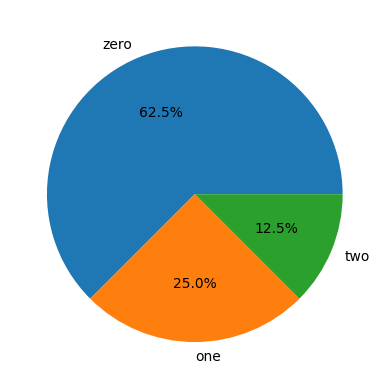

In [24]:
# Create a pie chart showing the relative percentage of teams with 0, 1, and 2
# red cards. Label the three pie slices 'zero', 'one', and 'two'.
zero = 0
one = 0
two = 0
for team in teamsList:
    if int(team['redCards']) == 0:
        zero += 1
    elif int(team['redCards']) == 1:
        one += 1
    elif int(team['redCards']) == 2:
        two += 1
plt.pie([zero, one, two], labels=['zero', 'one', 'two'], autopct='%1.1f%%')
plt.show()